In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-dataset-for-clustering/wine-clustering.csv


1. Objective of this notebook

The objective of this notebook is to find new segmentations by using other modeling than kmeans.

2. Approach

1) Data Outlines

2) Visualization

3) Clustering and PCA

First, I tried KMmeans. And I also tried GaussianMixture and KMedoids.

3. Insight

I got almost same result from GaussianMixture as KMeans. But I got the different segmentations from KMedoids.

1) In KMeans, I got 65 cluster2s, 63 cluster1s and 51 cluster0s. In KMedoids, I got 73 cluster2s, 54 cluster1s and 51 cluater0s.

2) There are some difference in means and median between KMeans and KMedoids which means I found new segmentation.

In [2]:
pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 887 kB/s 
Note: you may need to restart the kernel to use updated packages.


In [3]:
df=pd.read_csv('/kaggle/input/wine-dataset-for-clustering/wine-clustering.csv')

1) Data Outline

In [4]:
df.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [5]:
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids

from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [7]:
df.nunique()

Alcohol                 126
Malic_Acid              133
Ash                      79
Ash_Alcanity             63
Magnesium                53
Total_Phenols            97
Flavanoids              132
Nonflavanoid_Phenols     39
Proanthocyanins         101
Color_Intensity         132
Hue                      78
OD280                   122
Proline                 121
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


2) Visualization

Alcohol
Skew : -0.05


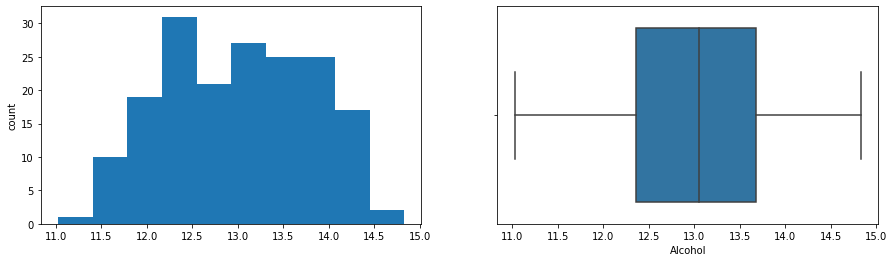

Malic_Acid
Skew : 1.04


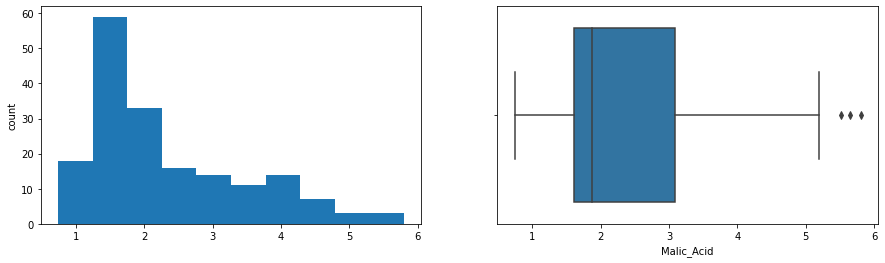

Ash
Skew : -0.18


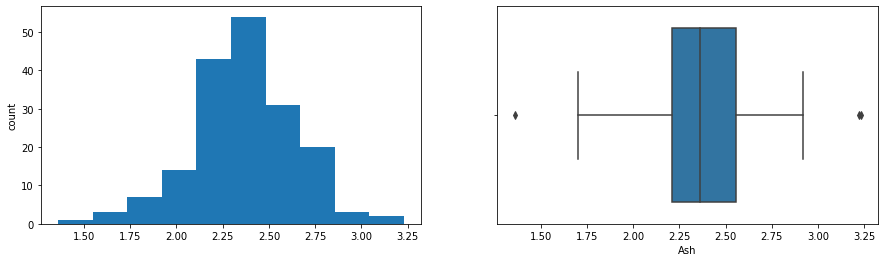

Ash_Alcanity
Skew : 0.21


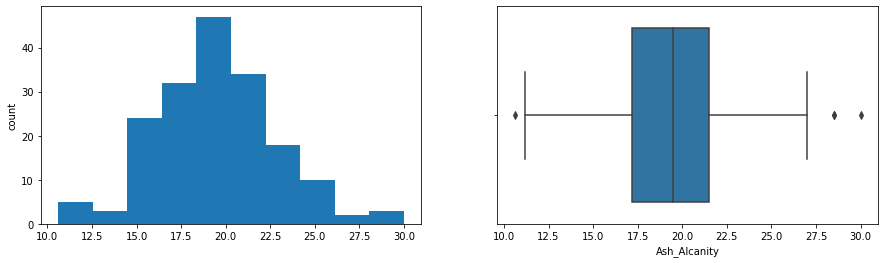

Magnesium
Skew : 1.1


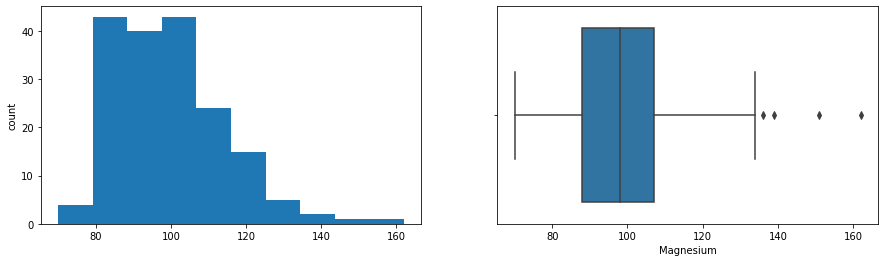

Total_Phenols
Skew : 0.09


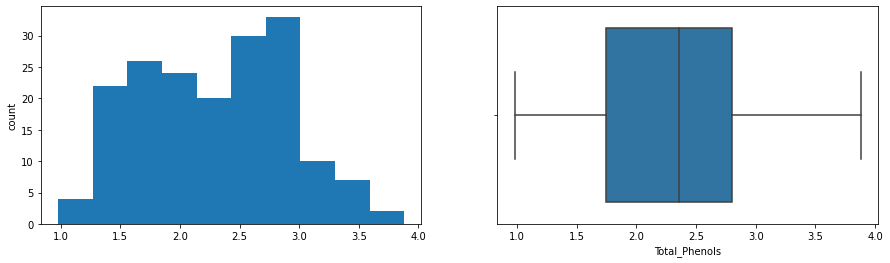

Flavanoids
Skew : 0.03


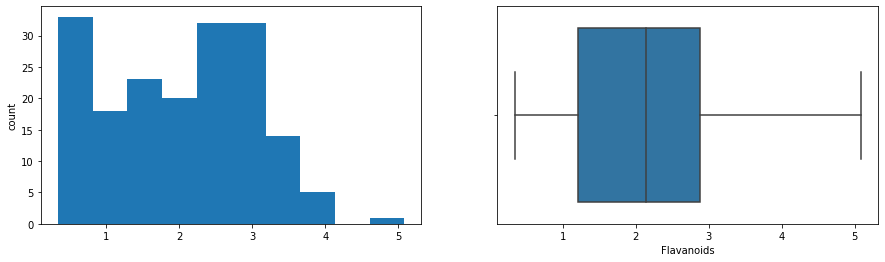

Nonflavanoid_Phenols
Skew : 0.45


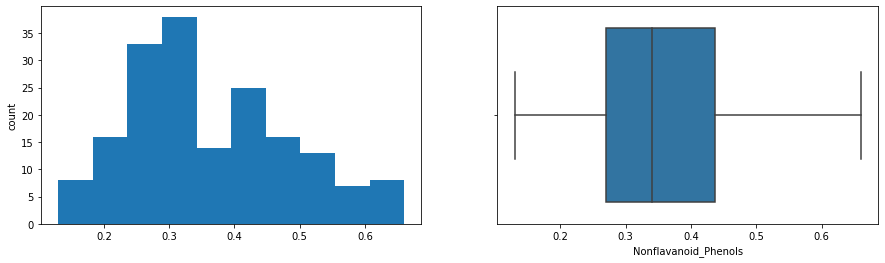

Proanthocyanins
Skew : 0.52


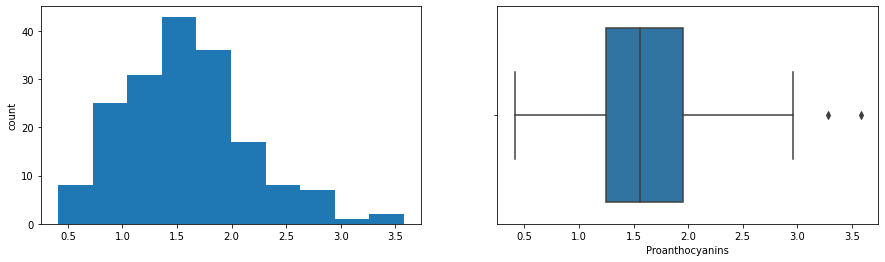

Color_Intensity
Skew : 0.87


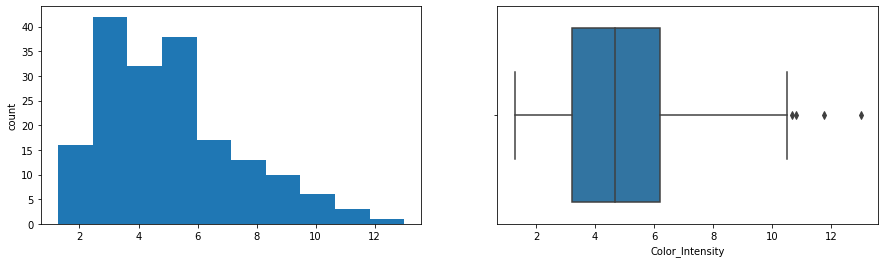

Hue
Skew : 0.02


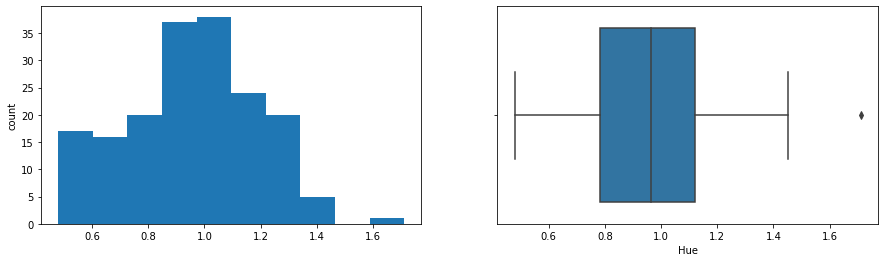

OD280
Skew : -0.31


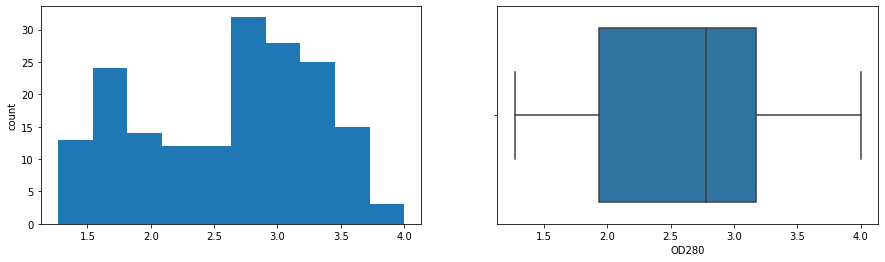

Proline
Skew : 0.77


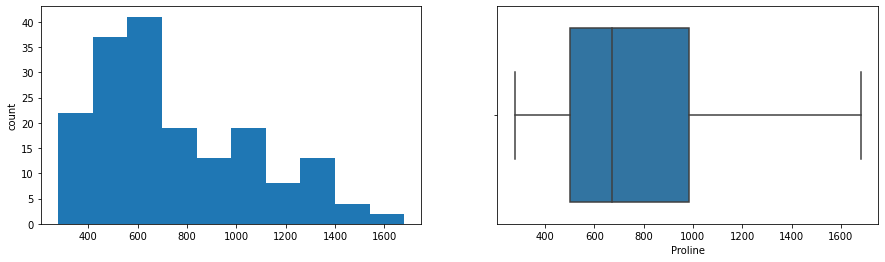

In [9]:
for col in df.columns:
    print(col)
    print('Skew :',round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show()

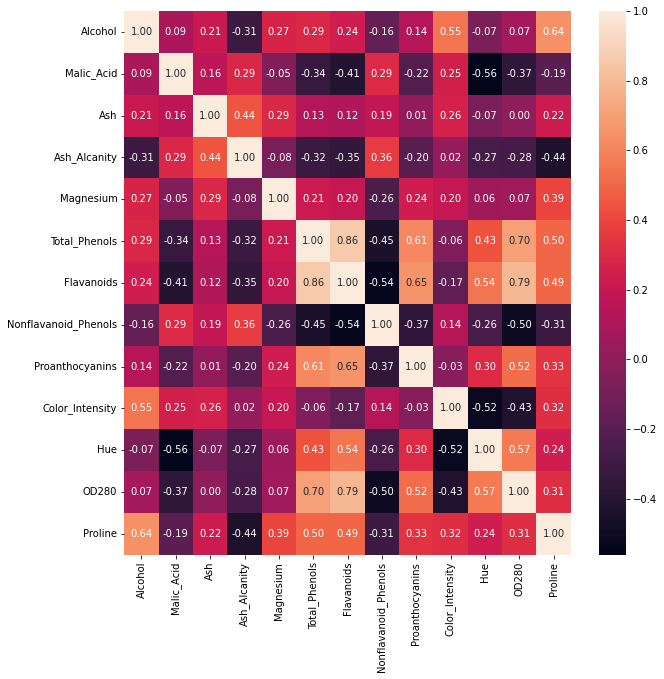

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt='0.2f')
plt.show()

3) Clustering

In [11]:
scaler=StandardScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [12]:
df_scaled.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [13]:
df_scaled_copy = df_scaled.copy(deep=True)

3)-1 KMeans

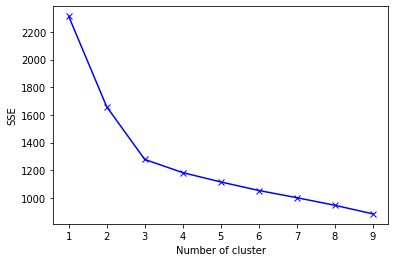

In [14]:
sse = {} 

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=1).fit(df_scaled)
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [15]:
kmeans = KMeans(n_clusters=3, max_iter= 1000, random_state=1)
kmeans.fit(df_scaled)
 
df_scaled_copy['Labels'] = kmeans.predict(df_scaled)
df['Labels'] = kmeans.predict(df_scaled)

In [16]:
df.Labels.value_counts()

2    65
1    62
0    51
Name: Labels, dtype: int64

In [17]:
mean = df.groupby('Labels').mean()
median = df.groupby('Labels').median()
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ['clus_0 Mean', 'clus_1 Mean', 'clus_2 Mean', 'clus_0 Median', 'clus_1 Median', 'clus_2 Median']
df_kmeans.T

,clus_0 Mean,clus_1 Mean,clus_2 Mean,clus_0 Median,clus_1 Median,clus_2 Median
Alcohol,13.134118,13.676774,12.250923,13.11,13.735,12.25
Malic_Acid,3.307255,1.997903,1.897385,3.27,1.765,1.61
Ash,2.417647,2.466290,2.231231,2.38,2.445,2.24
Ash_Alcanity,21.241176,17.462903,20.063077,21.00,17.000,20.00
Magnesium,98.666667,107.967742,92.738462,97.00,105.500,88.00
Total_Phenols,1.683922,2.847581,2.247692,1.65,2.825,2.20
Flavanoids,0.818824,3.003226,2.050000,0.70,2.975,2.03
Nonflavanoid_Phenols,0.451961,0.292097,0.357692,0.47,0.290,0.35
Proanthocyanins,1.145882,1.922097,1.624154,1.10,1.895,1.56
Color_Intensity,7.234706,5.453548,2.973077,7.30,5.400,2.90


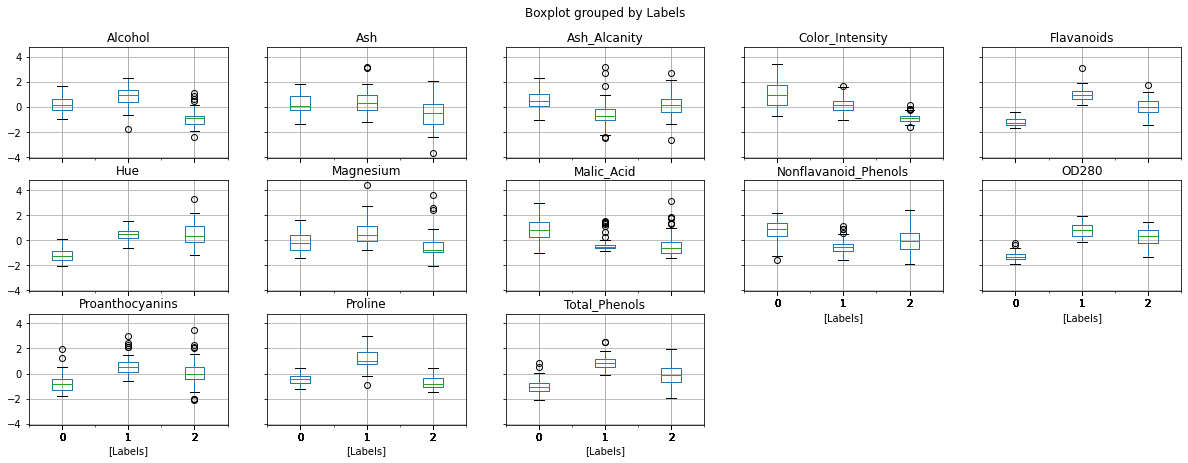

In [18]:
df_scaled_copy.boxplot(by = 'Labels', layout = (3,5),figsize=(20,7))
plt.show()

3)-2 GaussianMixture

In [19]:
gmm = GaussianMixture(n_components = 3, random_state = 1)
gmm.fit(df_scaled)

df_scaled_copy['GmmLabels'] = gmm.predict(df_scaled)
df['GmmLabels'] = gmm.predict(df_scaled)

In [20]:
df.GmmLabels.value_counts()

2    64
1    63
0    51
Name: GmmLabels, dtype: int64

In [21]:
original_features = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Labels']

mean = df.groupby('GmmLabels').mean()
median = df.groupby('GmmLabels').median()
df_gmm = pd.concat([mean, median], axis=0)
df_gmm.index = ['clus_0 Mean', 'clus_1 Mean', 'clus_2 Mean', 'clus_0 Median', 'clus_1 Median', 'clus_2 Median']
df_gmm[original_features].T

,clus_0 Mean,clus_1 Mean,clus_2 Mean,clus_0 Median,clus_1 Median,clus_2 Median
Alcohol,13.134118,13.665714,12.239531,13.11,13.73,12.235
Malic_Acid,3.307255,1.968254,1.925000,3.27,1.75,1.620
Ash,2.417647,2.434603,2.258750,2.38,2.43,2.265
Ash_Alcanity,21.241176,17.234921,20.328125,21.00,16.80,20.200
Magnesium,98.666667,108.920635,91.562500,97.00,106.00,88.000
Total_Phenols,1.683922,2.811429,2.273906,1.65,2.80,2.200
Flavanoids,0.818824,2.924603,2.112500,0.70,2.94,2.035
Nonflavanoid_Phenols,0.451961,0.287778,0.362969,0.47,0.29,0.370
Proanthocyanins,1.145882,1.945397,1.596563,1.10,1.95,1.560
Color_Intensity,7.234706,5.370952,3.015625,7.30,5.25,2.900


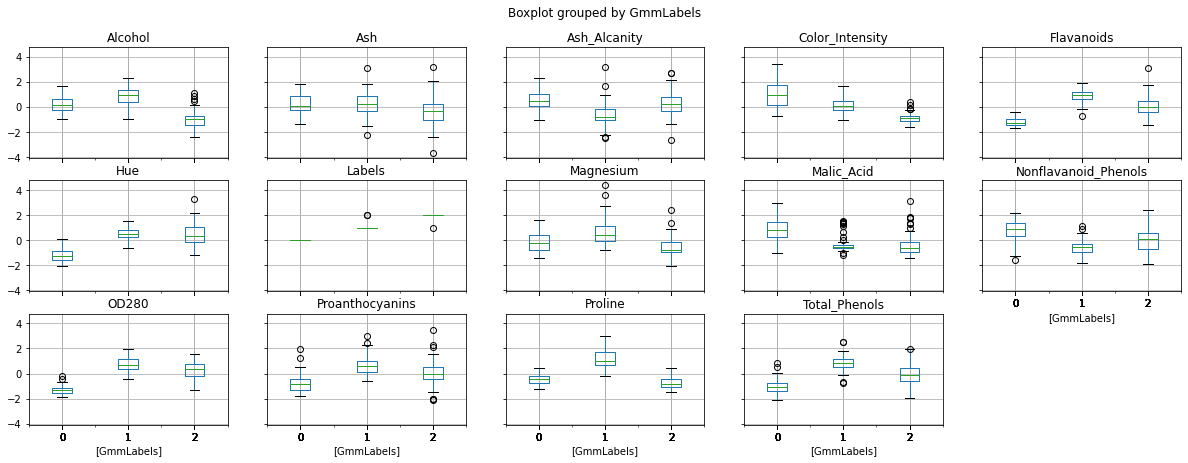

In [22]:
features_with_lables = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Labels', 'GmmLabels']

df_scaled_copy[features_with_lables].boxplot(by = 'GmmLabels', layout = (3,5),figsize=(20,7))
plt.show()

3)-3 KMedois

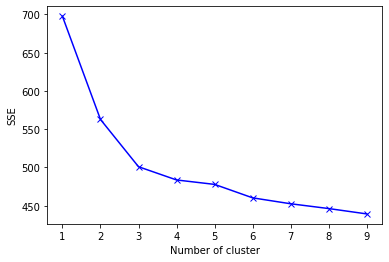

In [23]:
sse = {} 

for k in range(1, 10):
    kmedo = KMedoids(n_clusters=k, max_iter=1000, random_state=1).fit(df_scaled)
    sse[k] = kmedo.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [24]:
kmedo = KMedoids(n_clusters = 3, random_state=1)
kmedo.fit(df_scaled)

df_scaled_copy['kmedoLabels'] = kmedo.predict(df_scaled)
df['kmedoLabels'] = kmedo.predict(df_scaled)

In [25]:
df.kmedoLabels.value_counts()

2    73
1    54
0    51
Name: kmedoLabels, dtype: int64

In [26]:
mean = df.groupby('kmedoLabels').mean()
median = df.groupby('kmedoLabels').median()
df_kmedoids = pd.concat([mean, median], axis=0)
df_kmedoids.index = ['clus_0 Mean', 'clus_1 Mean', 'clus_2 Mean', 'clus_0 Median', 'clus_1 Median', 'clus_2 Median']
df_kmedoids[original_features].T

,clus_0 Mean,clus_1 Mean,clus_2 Mean,clus_0 Median,clus_1 Median,clus_2 Median
Alcohol,13.110980,12.282593,13.454658,13.11,12.290,13.64
Malic_Acid,3.341765,1.827778,2.010137,3.27,1.610,1.75
Ash,2.446471,2.190556,2.440822,2.38,2.215,2.42
Ash_Alcanity,21.539216,19.759259,17.871233,21.50,19.550,17.20
Magnesium,99.764706,90.388889,106.643836,97.00,88.000,103.00
Total_Phenols,1.686863,2.107778,2.858630,1.65,2.100,2.85
Flavanoids,0.827843,1.910000,2.956849,0.70,1.885,2.92
Nonflavanoid_Phenols,0.444314,0.386481,0.286027,0.47,0.370,0.28
Proanthocyanins,1.181569,1.464259,1.970548,1.14,1.435,1.95
Color_Intensity,7.145098,2.975185,5.140822,7.30,2.900,5.10


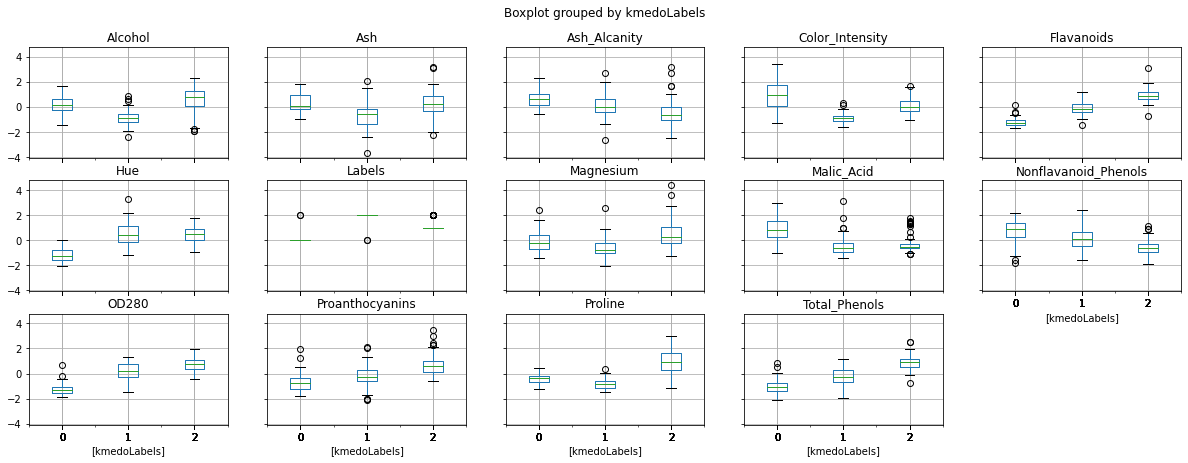

In [27]:
features_with_lables = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Labels', 'kmedoLabels']

df_scaled_copy[features_with_lables].boxplot(by = 'kmedoLabels', layout = (3,5),figsize=(20,7))
plt.show()

3)-4 Comparion between KMeans and KMedoids

In [28]:
comparison = pd.concat([df_kmedoids, df_kmeans], axis=1)[original_features]
comparison.T
# Upperline is KMedoids and Lower line is KMeans

,clus_0 Mean,clus_1 Mean,clus_2 Mean,clus_0 Median,clus_1 Median,clus_2 Median
Alcohol,13.110980,12.282593,13.454658,13.11,12.290,13.64
Alcohol,13.134118,13.676774,12.250923,13.11,13.735,12.25
Malic_Acid,3.341765,1.827778,2.010137,3.27,1.610,1.75
Malic_Acid,3.307255,1.997903,1.897385,3.27,1.765,1.61
Ash,2.446471,2.190556,2.440822,2.38,2.215,2.42
Ash,2.417647,2.466290,2.231231,2.38,2.445,2.24
Ash_Alcanity,21.539216,19.759259,17.871233,21.50,19.550,17.20
Ash_Alcanity,21.241176,17.462903,20.063077,21.00,17.000,20.00
Magnesium,99.764706,90.388889,106.643836,97.00,88.000,103.00
Magnesium,98.666667,107.967742,92.738462,97.00,105.500,88.00


3)-5 PCA and Mapping of KMeans and KMedoids

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_scaled)

PCA(n_components=2)

In [30]:
feature = pca.transform(df_scaled)

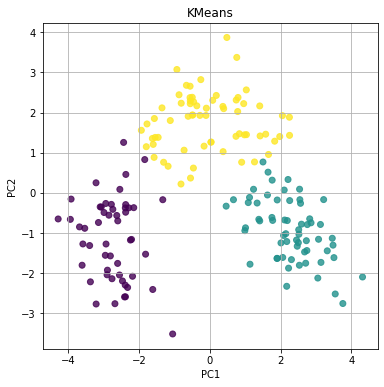

In [31]:
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(df.iloc[:, 13]))
plt.grid()
plt.title('KMeans')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

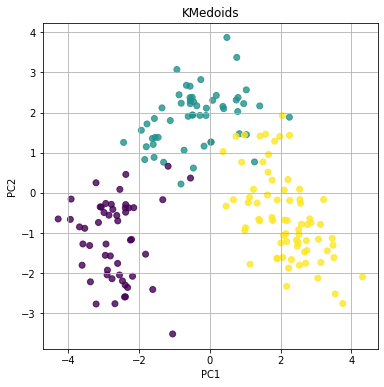

In [32]:
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(df.iloc[:, 15]))
plt.grid()
plt.title('KMedoids')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()